In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('data.csv')
df.head()

,road_width(m),number_of_floor,number_of_bedroom,area(m2),address,price(vnd)
0,2m,2 lầu,2 phòng ngủ,23 m2,"Đường Hải Phòng, Phường Tân Chính, Quận Thanh ...",4 triệu
1,4m,5 lầu,6 phòng ngủ,82 m2,"Phường Nam Dương, Quận Hải Châu, Đà Nẵng",30 triệu
2,15m,3 lầu,3 phòng ngủ,110 m2,"Đường Hồ Xuân Hương, Phường Mỹ An, Quận Ngũ Hà...","13,5 triệu"
3,5m,3 lầu,4 phòng ngủ,60 m2,"Đường Đa Mặn Đông 4, Phường Khuê Mỹ, Quận Ngũ ...",6 triệu
4,4m,1 lầu,1 phòng ngủ,65 m2,"Đường Nguyễn Văn Linh, Phường Nam Dương, Quận ...",5 triệu


In [3]:
#1. Clean data
df['road_width(m)'] = df['road_width(m)'].str.replace('m', '').str.replace(',', '.').astype(float)
df['number_of_floor'] = df['number_of_floor'].str.replace('lầu', '').astype(int)
df['number_of_bedroom'] = df['number_of_bedroom'].str.replace('phòng ngủ', '').astype(int)
df['area(m2)'] = df['area(m2)'].str.replace('m2', '').str.replace(',','.').astype(float)
df['price(vnd)'] = df['price(vnd)'].str.replace('triệu','').str.replace(',', '.').astype(float)*1000000
df['address'] = df['address'].str.split(', ').str[-2].str.replace('Quận ', '')

In [4]:
#2. Encode categorical data
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [4])], remainder='passthrough')
X = ct.fit_transform(X)

In [5]:
#3. Split data
from sklearn.model_selection import train_test_split
np.random.seed(1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

In [6]:
#4. Scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train[:, 6:] = sc.fit_transform(X_train[:, 6:])
X_test[:, 6:] = sc.transform(X_test[:,6:])

In [7]:
#5. Train the model
## a. DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor

dt_model = DecisionTreeRegressor(random_state=1)
dt_model.fit(X_train, y_train)


DecisionTreeRegressor(random_state=1)

In [8]:
y_predict = dt_model.predict(X_test)
accuracy = np.round(np.abs((y_predict - y_test) / y_test * 100), 2)
dt_model_res = pd.DataFrame({'y': y_test, 'y_predict': y_predict, 'dif(%)': accuracy})
# dif is the difference between the actual value and the predicted value (%), 
# the lower the number, the more accurate the prediction model is with the actual value, 
# dif 0% means the prediction is 100% accurate.
mean_dif = round(dt_model_res["dif(%)"].mean(), 2)
# mean dif is showing the accuracy of the model, 0% is the best, 
# with mean dif being x%, the model predicts x% deviation from reality.

# mean_dif of DecisionTreeRegressor is 31.95%

In [9]:
## b. RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(random_state=1)
rf_model.fit(X_train, y_train)

y_predict = rf_model.predict(X_test)
accuracy = np.round(np.abs((y_predict - y_test) / y_test * 100), 2)
rf_model_res = pd.DataFrame({'y': y_test, 'y_predict': y_predict, 'dif(%)': accuracy})
mean_dif = round(rf_model_res["dif(%)"].mean(), 2)

# mean_dif of RandomForestRegressor is 45.92%

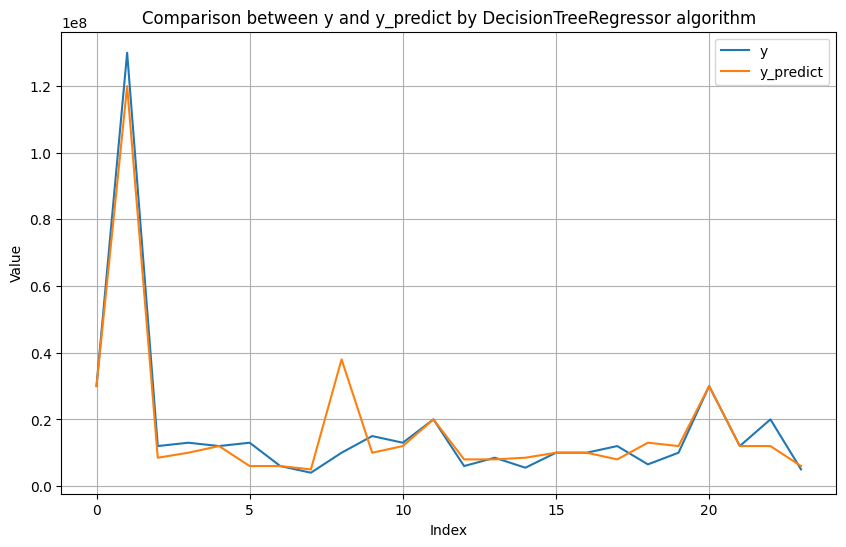

In [10]:
# draw the chart of DecisionTreeRegressor
plt.figure(figsize=(10, 6))
plt.plot(dt_model_res['y'], label='y')
plt.plot(dt_model_res['y_predict'], label='y_predict')
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Comparison between y and y_predict by DecisionTreeRegressor algorithm')
plt.legend()
plt.grid(True)
plt.show()

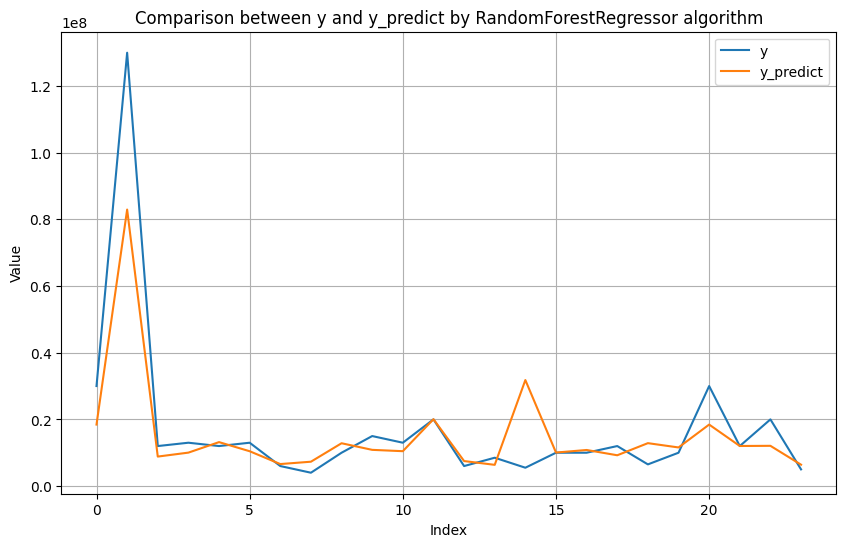

In [11]:
# draw the chart of RandomForestRegressor
plt.figure(figsize=(10, 6))
plt.plot(rf_model_res['y'], label='y')
plt.plot(rf_model_res['y_predict'], label='y_predict')
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Comparison between y and y_predict by RandomForestRegressor algorithm')
plt.legend()
plt.grid(True)
plt.show()